# 读取Iris数据，绘图

(150, 5) (150, 5)


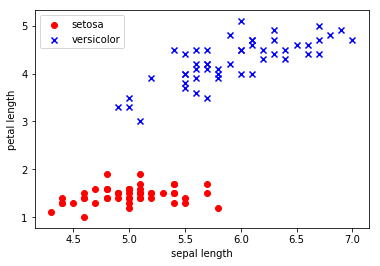

In [59]:
#读取Iris数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

#内嵌画图
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.data', header = None)
print (df.shape, df.shape)
df.head()
#选取前100行，第五列(第五列是分类的正确结果)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) ##如果是 Iris-setosa, y=-1,否则就是1 （二元分类）

#.iloc[0:100,[0，2]] 读取前100行的 前第0列和第2列的数据，即选取sepal长度petal长度
X = df.iloc[0:100, [0, 2]].values
#绘图
plt.scatter(X[:50,0],X[:50,1],c='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],c='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

## 附Perceptron一段代码
理解fit()函数中两个for循环（主要是第二个for循环）：
for _ in range(self.n_iter):
    errors = 0
    for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update #更新权值，x0 =1?
        errors += int(update != 0.0) #我理解int(True) = 1 int(False) = 0 
    self.errors_.append(errors) 
    
 一是第二个for循环是将数据集中数据一组一组输入，update等于0，意味着在当前权重值下，预测结果和真实结果一致；update不等于1，意味着当前权重下，预测结果和真实结果不一致，则需要改变权重，改变量和当前输入数据直接关联起来，即增加：update * xi，继续将改变后的权重值用于下一个数据的预测，不段进行下，直接遍历完所有数据，并统计有多少个结果预测错误
 二是errors_记录的是第一个for循环每一次分类错误的数量

In [60]:
import numpy as np
class Perceptron(object):
    """
    Perceptron classifier.
    Parameters(参数)
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0) 学习效率
    n_iter : int
    Passes over the training dataset(数据集).
    Attributes（属性）
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch（时间起点）.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        '''
        Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features] X的形式是列矩阵
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        '''

        self.w_ = np.zeros(1 + X.shape[1])
        # zeros()创建了一个 长度为 1+X.shape[1] = 1+n_features 的 0数组
        #初始化权值为0
        # self.w_ 权向量
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update #更新权值，x0 =1?
                errors += int(update != 0.0) #我理解int(True) = 1 int(False) = 0 
            self.errors_.append(errors) #每一步的累积误差
        return self

    def net_input(self, X):
        """Calculate net input"""
        return (np.dot(X, self.w_[1:])+self.w_[0])

    def predict(self, X):
        """return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 调用perceptron类，进行学习

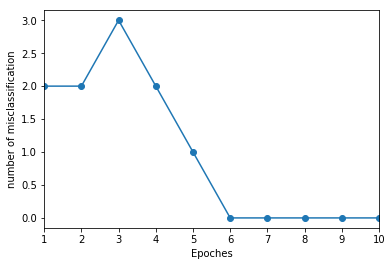

In [61]:
#from sklearn.linear_model import Perceptron #Perceptron是一个二元划分的类
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('number of misclassification')
plt.xlim(1, 10)
plt.savefig('Number of misclassification-Epoches.png', bbox_inches = 'tight') #将图片存到本地
plt.show()

# 可视化

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#可视化模型预测结果
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    #setup marker generator and color map(设置标记生成器和颜色映射)
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #np.unique():对于一维数组或者列表，unique函数去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表
    
    #plot the decision surface(绘制决策图面)
    ## 生成网格数据
    ## xx1为横隔线
    ## xx2为纵隔线
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #print (X[:, 0].min())
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #X[:,k] 冒号左边表示行范围，读取所有行，冒号右边表示列范围，读取第K列
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange( x2_min, x2_max, resolution))
    #print (xx1)
    #print (xx1.shape)
    #print (xx2)
    #print (xx2.shape)
    #arange(start,end,step) 返回一个一维数组
    #meshgrid(x,y)产生一个以x为行，y为列的矩阵
    #xx1是一个(305*235)大小的矩阵 xx1.ravel()是将所有的行放在一个行里面的长度71675的一维数组
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #np.array([xx1.ravel(), xx2.ravel()]) 生成了一个 (2*71675)的矩阵
    # xx1.ravel() = (1,71675)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #alpha = 0.4 为填充颜色透明度
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    print(np.unique(y))
    #若y = [-1 , 1], 则enumerate(y)表示
    #0， -1
    #1， 1
    """
    """
    for idx, cl in enumerate(np.unique(y)):
        #x=X[y==cl, 0]
        #y=X[y==cl, 1]
        #print (x)
        #print (y)
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker = markers[idx],label = cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[-1  1]


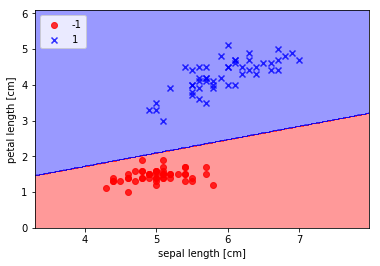

In [63]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.savefig(' decision_regions.png')
plt.show()

# 应用

为了让我们这个神经网络模型的分类效果更明显，我们选取一部分样本作为训练集，另一部分样本作为预测的数据

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[-1  1]


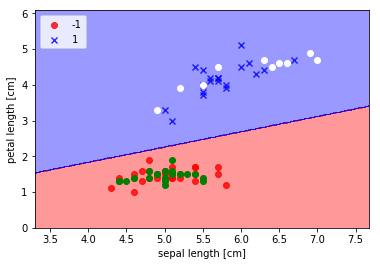

In [64]:
#更改训练集

y1 = df.iloc[0:30, 4].values
x1 = df.iloc[0:30,[0,2]]
y2 = df.iloc[80:100, 4].values
x2 = df.iloc[80:100, [0,2]]

y = np.hstack((y1, y2))
X= np.vstack((x1, x2))
y = np.where(y == 'Iris-setosa', -1, 1)
X2 = df.iloc[30:60, [0,2]].values

#抓取30个第一类花的样本以及20个第二类花的样本组成的训练集训练
ppn = Perceptron(eta = 0.01, n_iter = 10)
ppn.fit(X, y) #训练

#预测，x2用作测试集，包括20个是第一类花的样本和10个第二类花的样本
plot_decision_regions(X,y, classifier=ppn)
plt.scatter(X2[0:20, 0], X2[0:20, 1], c = 'g')
plt.scatter(X2[20:30, 0], X2[20:30, 1], c = 'w')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()


